In [1]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import cv2

In [3]:
import os 

In [4]:
def getimglist(imgdir):
    diclist = os.listdir(imgdir)
    imglist =[]
    for filename in diclist:
        newname = imgdir+ filename
        img = cv2.imread(newname)
        imglist.append(img)
    return imglist

In [5]:
def showimage(imagelist,col,row,figsize,IsBGR2RGB=True):
    fig, axes = plt.subplots(col, row, sharex=True, sharey=True, figsize=figsize)
    for ii, ax in zip(range(col*row), axes.flatten()):
        img = imagelist[ii]
        if IsBGR2RGB == True:
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        ax.imshow(img, aspect='equal',cmap='gray')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [6]:
def red_detect(imagelist):
    blurlist =[]
    circle_list = []
    redlist=[]
    comlist =[]
    overlaplist =[]
    noiselist=[]
    for img in imagelist:
        image = img.copy()
        HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_band = np.array([0,50,50])
        upper_band = np.array([10,255,255])
        red = cv2.inRange(HSV, lower_band , upper_band)
        lower_band = np.array([170,50,50])
        upper_band = np.array([180,255,255])
        complementary = cv2.inRange(HSV, lower_band , upper_band)
        overlap = cv2.addWeighted(red, 1.0, complementary, 1.0, 0.0)
        noise_remove = cv2.medianBlur(overlap,7)
        blur = cv2.GaussianBlur(noise_remove,(15,15),0)
        circles = cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT,0.5,41, param1=70,param2=30,minRadius=5,maxRadius=150)
        blurlist.append(blur)
        circle_list.append(circles)
        comlist.append(complementary)
        redlist.append(red)
        overlaplist.append(overlap)
        noiselist.append(noise_remove)
    return blurlist,circles,redlist,comlist,overlaplist,noiselist

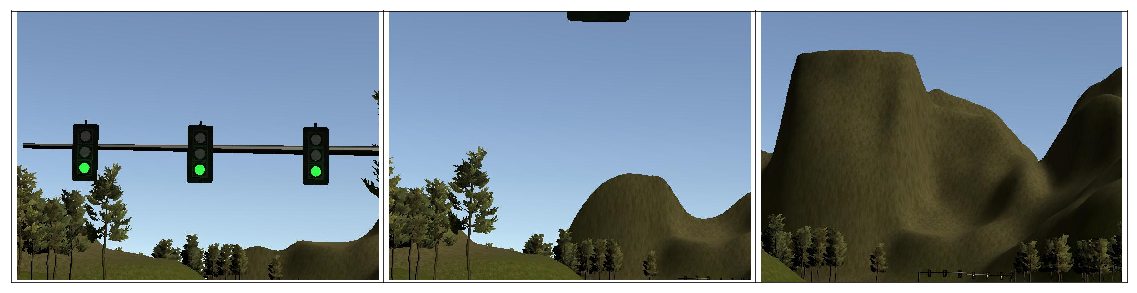

In [8]:
imgdir = './test1/'
imglist = getimglist(imgdir)
showimage(imglist,1,3,(20,5))

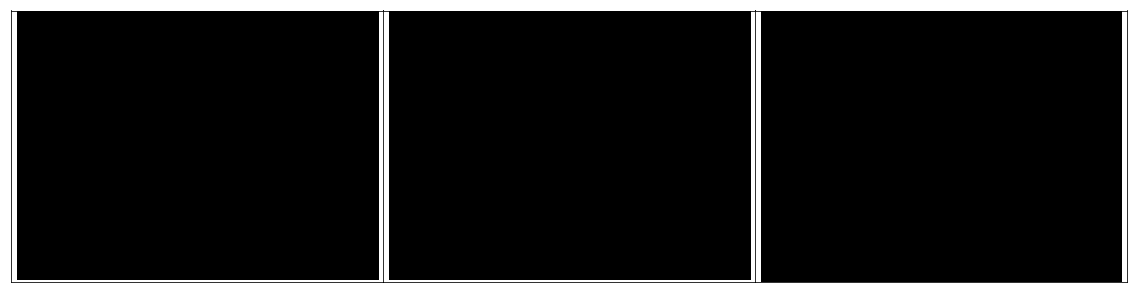

In [12]:
trans,circles,redlist,comlist,overlaplist,noiselist = red_detect(imglist)
showimage(trans,1,3,(20,5),False)

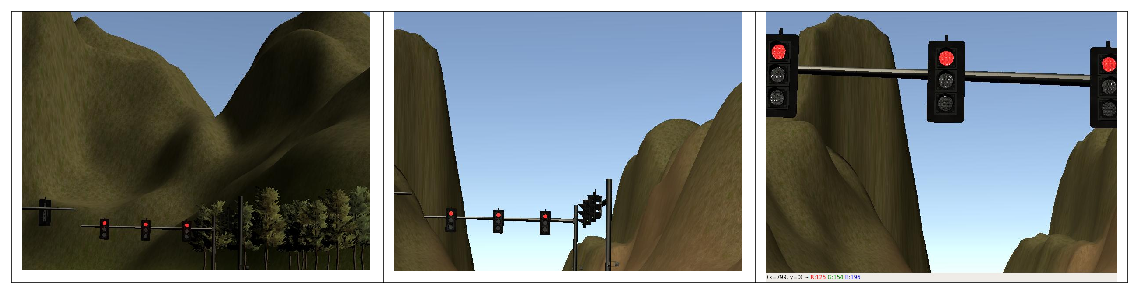

In [13]:
imgdir = './test2/'
imglist = getimglist(imgdir)
showimage(imglist,1,3,(20,5))

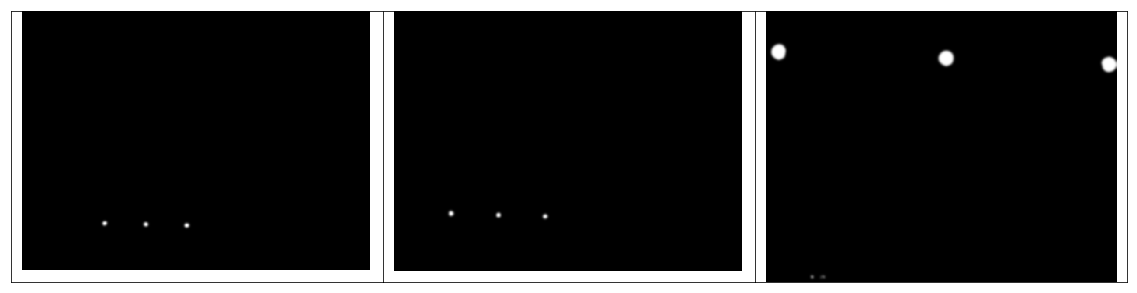

In [14]:
trans,circles,redlist,comlist,overlaplist,noiselist = red_detect(imglist)
showimage(trans,1,3,(20,5),False)

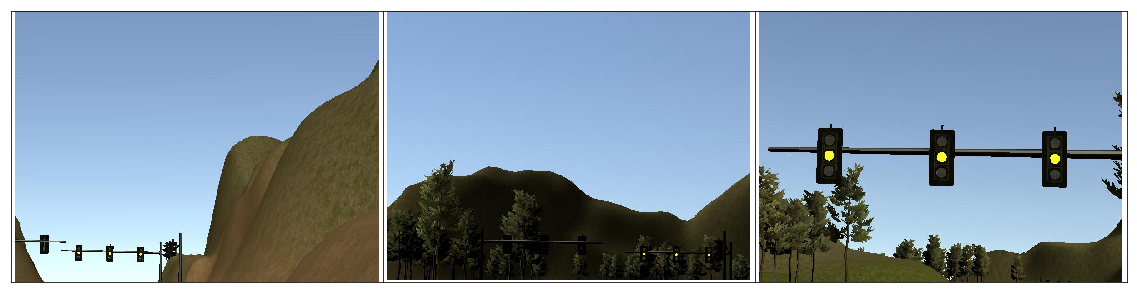

In [17]:
imgdir = './test3/'
imglist = getimglist(imgdir)
showimage(imglist,1,3,(20,5))

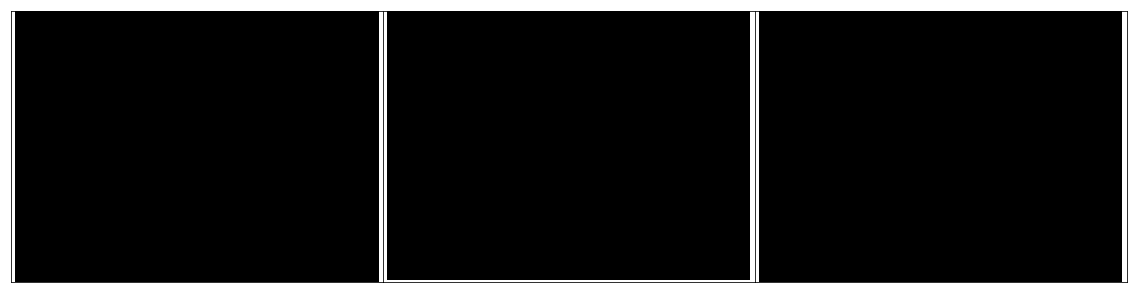

In [18]:
trans,circles,redlist,comlist,overlaplist,noiselist = red_detect(imglist)
showimage(trans,1,3,(20,5),False)

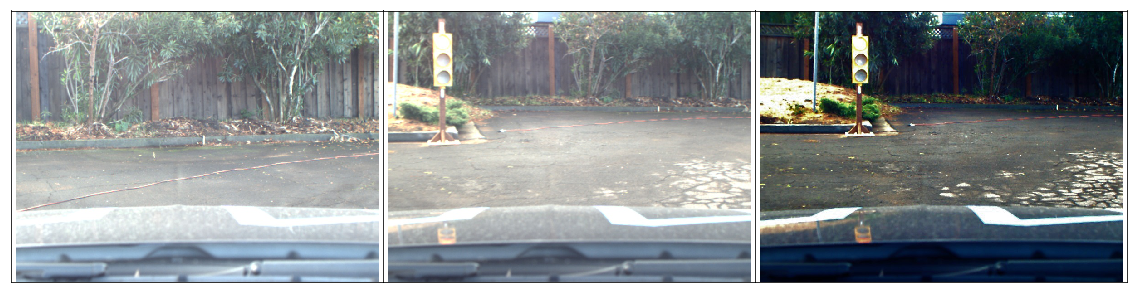

In [21]:
imgdir = './test4/'
imglist = getimglist(imgdir)
showimage(imglist,1,3,(20,5))

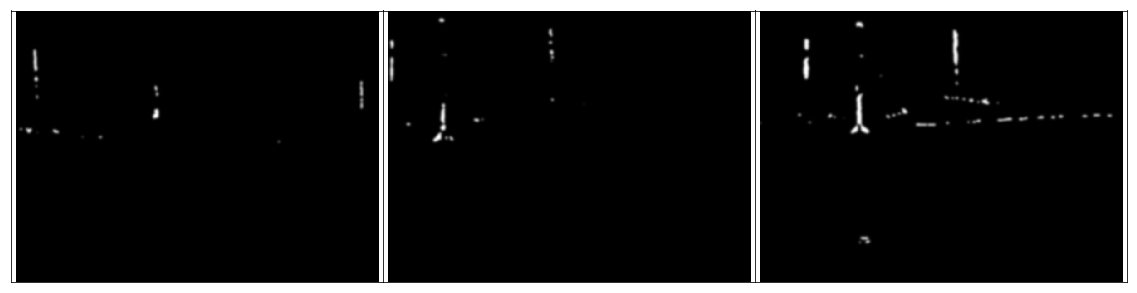

In [22]:
trans,circles,redlist,comlist,overlaplist,noise = red_detect(imglist)
showimage(trans,1,3,(20,5),False)